# **PART A**

In [50]:
import tensorflow as tf
from keras import layers, models
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD

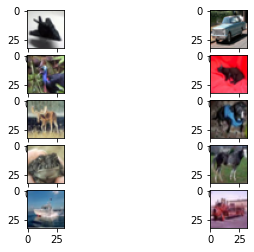

In [51]:
# load data
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
samples = [29, 32, 24, 21, 28, 27, 25, 37, 62, 67]
# plot image of each class
plt.figure(0)
for i in range(5):
    for j in range(2):
        plt.subplot2grid((5, 2), (i, j))
        plt.imshow(train_data[samples[2 * i + j]])
plt.show()

In [52]:
# normalize data
train_data = train_data / 255.0
test_data = test_data / 255.0

In [53]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 64)                524352    
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
Total params: 525,418
Trainable params: 525,418
Non-trainable params: 0
_______________________________________________

In [54]:
# training the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=10,
                    validation_data=(test_data, test_label), batch_size=64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 7s 8ms/step - loss: 1.7363 - accuracy: 0.3771 - val_loss: 1.5033 - val_accuracy: 0.4461
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.3558 - accuracy: 0.5153 - val_loss: 1.2886 - val_accuracy: 0.5346
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.2229 - accuracy: 0.5651 - val_loss: 1.4079 - val_accuracy: 0.5135
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 1.1441 - accuracy: 0.5953 - val_loss: 1.2103 - val_accuracy: 0.5698
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0819 - accuracy: 0.6190 - val_loss: 1.1488 - val_accuracy: 0.5951
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0314 - accuracy: 0.6352 - val_loss: 1.1320 - val_accuracy: 0.5952
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.9754 - accuracy: 0.6576 - val_loss: 1.1512 - val_accuracy: 0.6030
Epoch 8/10
782/78

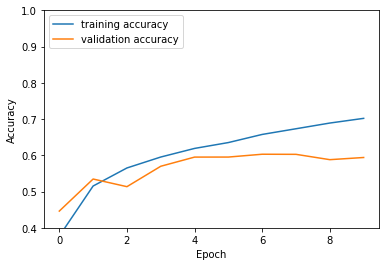

313/313 - 1s - loss: 1.1706 - accuracy: 0.5940 - 948ms/epoch - 3ms/step
1563/1563 - 4s - loss: 0.8088 - accuracy: 0.7070 - 4s/epoch - 3ms/step
accuracy on test data: 0.593999981880188
loss on test data: 1.170643925666809
accuracy on train data: 0.707040011882782
loss on train data: 0.8088199496269226


In [55]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

# **PART B**

In [56]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 4096)              0         
                                                                 
 dense_30 (Dense)            (None, 64)              

In [57]:
# training the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=10,
                    validation_data=(test_data, test_label), batch_size=64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 9s 11ms/step - loss: 1.7133 - accuracy: 0.3786 - val_loss: 1.4731 - val_accuracy: 0.4756
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.2723 - accuracy: 0.5469 - val_loss: 1.1620 - val_accuracy: 0.5945
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 1.1014 - accuracy: 0.6088 - val_loss: 1.0665 - val_accuracy: 0.6198
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.9701 - accuracy: 0.6572 - val_loss: 0.9813 - val_accuracy: 0.6598
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.8840 - accuracy: 0.6870 - val_loss: 0.9608 - val_accuracy: 0.6601
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.8092 - accuracy: 0.7146 - val_loss: 0.9577 - val_accuracy: 0.6613
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 0.7423 - accuracy: 0.7394 - val_loss: 0.9319 - val_accuracy: 0.6724
Epoch 8/10
782

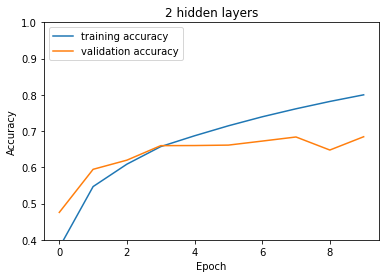

313/313 - 1s - loss: 0.9711 - accuracy: 0.6844 - 1s/epoch - 3ms/step
1563/1563 - 5s - loss: 0.4791 - accuracy: 0.8350 - 5s/epoch - 3ms/step
accuracy on test data: 0.6844000220298767
loss on test data: 0.9710623025894165
accuracy on train data: 0.8349599838256836
loss on train data: 0.4791039824485779


In [58]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('2 hidden layers')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

In [59]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 8, 8, 128)         32896     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 4, 4, 128)      

In [60]:
# training the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=10,
                    validation_data=(test_data, test_label), batch_size=64)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 10s 12ms/step - loss: 1.7430 - accuracy: 0.3680 - val_loss: 1.3648 - val_accuracy: 0.5066
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 1.2897 - accuracy: 0.5386 - val_loss: 1.1364 - val_accuracy: 0.5917
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0911 - accuracy: 0.6093 - val_loss: 1.0337 - val_accuracy: 0.6395
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.9620 - accuracy: 0.6602 - val_loss: 0.9767 - val_accuracy: 0.6600
Epoch 5/10
782/782 [==============================] - 9s 12ms/step - loss: 0.8684 - accuracy: 0.6952 - val_loss: 0.9092 - val_accuracy: 0.6796
Epoch 6/10
782/782 [==============================] - 9s 12ms/step - loss: 0.7943 - accuracy: 0.7219 - val_loss: 0.8811 - val_accuracy: 0.6911
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 0.7298 - accuracy: 0.7436 - val_loss: 0.8978 - val_accuracy: 0.6947
Epoch 8

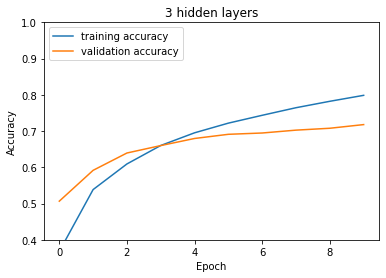

313/313 - 1s - loss: 0.8854 - accuracy: 0.7179 - 1s/epoch - 3ms/step
1563/1563 - 6s - loss: 0.4880 - accuracy: 0.8289 - 6s/epoch - 4ms/step
accuracy on test data: 0.7178999781608582
loss on test data: 0.8853756785392761
accuracy on train data: 0.8288800120353699
loss on train data: 0.4880475103855133


In [61]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('3 hidden layers')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

In [62]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)        8256      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 8, 8, 128)         32896     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 4, 4, 128)      

In [ ]:
# training the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=10,
                    validation_data=(test_data, test_label), batch_size=64)

In [ ]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('4 hidden layers')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

# **PART C**

In [ ]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='tanh', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='tanh', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='tanh', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

In [ ]:
# training the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=10,
                    validation_data=(test_data, test_label), batch_size=64)

In [ ]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ReLU activation')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

# **PART D**

In [ ]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='tanh', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='tanh', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='tanh', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

In [ ]:
# training the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=10,
                    validation_data=(test_data, test_label), batch_size=64)

In [ ]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Tanh activation & ADAM')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

In [ ]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

In [ ]:
# training the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=10,
                    validation_data=(test_data, test_label), batch_size=64)

In [ ]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ReLU activation & ADAM')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

# **PART E**

In [ ]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (2, 2), activation='relu',padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (2, 2), activation='relu',padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

In [ ]:
# training the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(test_data, test_label), batch_size=64)

In [ ]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('10% Dropout')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

In [ ]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (2, 2), activation='relu',padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (2, 2), activation='relu',padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

In [ ]:
# training the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(test_data, test_label), batch_size=64)

In [ ]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('20% Dropout')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

In [ ]:
# define our model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3),padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(64, (2, 2), activation='relu',padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(128, (2, 2), activation='relu',padding="same",strides=(1,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

In [ ]:
# training the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
fit_history = model.fit(train_data, train_label, epochs=20,
                    validation_data=(test_data, test_label), batch_size=64)

In [1]:
plt.plot(fit_history.history['accuracy'], label='training accuracy')
plt.plot(fit_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('15% Dropout')
plt.ylim([0.4, 1])
plt.legend(loc='upper left')
plt.show()
# calculate loss and accuracy on test data and print it
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
train_loss, train_acc = model.evaluate(train_data,  train_label, verbose=2)
print("accuracy on test data:",test_acc)
print("loss on test data:",test_loss)
print("accuracy on train data:",train_acc)
print("loss on train data:",train_loss)

NameError: ignored